In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

pd.options.display.max_rows = 1000

In [2]:
def getData (filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_proof', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)   
    data['method'] = data['method'].astype(str)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

In [3]:
filename = "CutIntroDataLog.txt"
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
print(data_other_exp.shape)
data_other_exp[['method', 'file', 'status']]

(470, 20)


,method,file,status
452,one_cut_one_quant,testing/TSTP/prover9/MGT/MGT054+1/Prover9---11...,cutintro_other_exception
476,one_cut_one_quant,testing/TSTP/prover9/GRP/GRP130-1.003/Prover9-...,cutintro_other_exception
481,one_cut_one_quant,testing/TSTP/prover9/SEU/SEU154+1/Prover9---11...,cutintro_other_exception
499,one_cut_one_quant,testing/TSTP/prover9/SWV/SWV745-1/Prover9---11...,cutintro_other_exception
555,one_cut_one_quant,testing/TSTP/prover9/GRP/GRP199-1/Prover9---11...,cutintro_other_exception
584,one_cut_one_quant,testing/TSTP/prover9/SEU/SEU102+1/Prover9---11...,cutintro_other_exception
598,one_cut_one_quant,testing/TSTP/prover9/SYN/SYN084+1/Prover9---11...,cutintro_other_exception
600,one_cut_one_quant,testing/TSTP/prover9/SYN/SYN052-1/Prover9---11...,cutintro_other_exception
610,one_cut_one_quant,testing/TSTP/prover9/SYN/SYN954+1/Prover9---11...,cutintro_other_exception
623,one_cut_one_quant,testing/TSTP/prover9/GRP/GRP561-1/Prover9---11...,cutintro_other_exception


In [5]:
# Test that are ok in one_cut_one_quantifier and fail for many_cuts_one_quantifier_1

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcoq1'))

diff = merged[(merged.status_ocoq == 'ok') & (merged.status_mcoq1 != 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcoq1']]

(261, 39)


,file,status_ocoq,status_mcoq1
4,LinearExampleProof(5),ok,cutintro_uncompressible
20,SquareDiagonalExampleProof(2),ok,cutintro_uncompressible
81,SumOfOnesExampleProof(2),ok,cutintro_uncompressible
97,testing/TSTP/prover9/SWV/SWV480+1/Prover9---11...,ok,prcons_timeout
110,testing/TSTP/prover9/SWV/SWV466+1/Prover9---11...,ok,grammar_finding_timeout
111,testing/TSTP/prover9/GEO/GEO070-3/Prover9---11...,ok,grammar_finding_timeout
133,testing/TSTP/prover9/MGT/MGT055-1/Prover9---11...,ok,cutintro_uncompressible
147,testing/TSTP/prover9/SEU/SEU340+1/Prover9---11...,ok,cutintro_uncompressible
153,testing/TSTP/prover9/SET/SET927+1/Prover9---11...,ok,cutintro_uncompressible
154,testing/TSTP/prover9/SET/SET510-6/Prover9---11...,ok,prcons_timeout


In [6]:
# Test that are ok in many_cuts_one_quantifier_1 and fail for one_cut_one_quantifier

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcmq1'))

diff = merged[(merged.status_ocoq != 'ok') & (merged.status_mcmq1 == 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcmq1']]

(79, 39)


,file,status_ocoq,status_mcmq1
18,LinearExampleProof(19),grammar_finding_timeout,ok
30,SquareDiagonalExampleProof(12),grammar_finding_timeout,ok
42,SquareEdgesExampleProof(12),grammar_finding_timeout,ok
67,LinearEqExampleProof(12),grammar_finding_timeout,ok
73,SumOfOnesF2ExampleProof(6),grammar_finding_timeout,ok
79,SumOfOnesFExampleProof(6),grammar_finding_timeout,ok
86,SumOfOnesExampleProof(7),grammar_finding_timeout,ok
90,UniformAssociativity3ExampleProof(4),grammar_finding_timeout,ok
127,testing/TSTP/prover9/MGT/MGT054+1/Prover9---11...,cutintro_other_exception,ok
259,testing/TSTP/prover9/SEU/SEU102+1/Prover9---11...,cutintro_other_exception,ok


In [7]:
# Regressions compared to previous test

previous_filename = "../2015-03-15/CutIntroDataLog.txt"
previous_data = getData(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'])
#merged.head(0)

regression = merged[(merged.status_y == 'ok') & (merged.status_x != 'ok')]
#regression.head(0)
print(regression.shape)

regression_delta = regression[(regression.method == 'one_cut_one_quant') | (regression.method == 'one_cut_many_quant')]
print(regression_delta.shape)
#regression_delta.head(0)

regression_maxsat = regression[((regression.method == 'many_cuts_one_quant_1') | (regression.method == 'many_cuts_one_quant_2')) ]
print(regression_maxsat.shape)
#regression_maxsat.head(0)

regression[['method', 'file', 'status_x', 'status_y']]

(278, 38)
(146, 38)
(132, 38)


,method,file,status_x,status_y
144,many_cuts_one_quant_1,LinearExampleProof(5),cutintro_uncompressible,ok
211,many_cuts_one_quant_2,LinearExampleProof(4),cutintro_uncompressible,ok
232,many_cuts_one_quant_2,SquareEdgesExampleProof(2),cutintro_uncompressible,ok
265,many_cuts_one_quant_2,SumOfOnesExampleProof(2),cutintro_uncompressible,ok
306,one_cut_one_quant,testing/TSTP/prover9/MGT/MGT054+1/Prover9---11...,cutintro_other_exception,ok
353,one_cut_one_quant,testing/TSTP/prover9/SWV/SWV745-1/Prover9---11...,cutintro_other_exception,ok
409,one_cut_one_quant,testing/TSTP/prover9/GRP/GRP199-1/Prover9---11...,cutintro_other_exception,ok
438,one_cut_one_quant,testing/TSTP/prover9/SEU/SEU102+1/Prover9---11...,cutintro_other_exception,ok
452,one_cut_one_quant,testing/TSTP/prover9/SYN/SYN084+1/Prover9---11...,cutintro_other_exception,ok
464,one_cut_one_quant,testing/TSTP/prover9/SYN/SYN954+1/Prover9---11...,cutintro_other_exception,ok


In [8]:
# Separating data by method and database
data_ocoq_examples = data[(data.method == 'one_cut_one_quant') & (data.db == 0)]
data_ocoq_prover9 = data[(data.method == 'one_cut_one_quant') & (data.db == 1)]
data_ocoq_verit = data[(data.method == 'one_cut_one_quant') & (data.db == 2)]
data_ocmq_examples = data[(data.method == 'one_cut_many_quant') & (data.db == 0)]
data_ocmq_prover9 = data[(data.method == 'one_cut_many_quant') & (data.db == 1)]
data_ocmq_verit = data[(data.method == 'one_cut_many_quant') & (data.db == 2)]
data_mcoq1_examples = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 0)]
data_mcoq1_prover9 = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 1)]
data_mcoq1_verit = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 2)]
data_mcoq2_examples = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 0)]
data_mcoq2_prover9 = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 1)]
data_mcoq2_verit = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 2)]

print("=== Number of tests per database and method:\n")

print("Proof examples - one cut one quantifier:", data_ocoq_examples.shape[0])
print("Proof examples - one cut many quantifiers:", data_ocmq_examples.shape[0])
print("Proof examples - many (1) cuts one quantifier:", data_mcoq1_examples.shape[0])
print("Proof examples - many (2) cuts one quantifier:", data_mcoq1_examples.shape[0])
print()

print("Prover9 - one cut one quantifier:", data_ocoq_prover9.shape[0])
print("Prover9 - one cut many quantifiers:", data_ocmq_prover9.shape[0])
print("Prover9 - many (1) cuts one quantifier:", data_mcoq1_prover9.shape[0])
print("Prover9 - many (2) cuts one quantifier:", data_mcoq1_prover9.shape[0])
print()

print("VeriT - one cut one quantifier:", data_ocoq_verit.shape[0])
print("VeriT - one cut many quantifiers:", data_ocmq_verit.shape[0])
print("VeriT - many (1) cuts one quantifier:", data_mcoq1_verit.shape[0])
print("VeriT - many (2) cuts one quantifier:", data_mcoq1_verit.shape[0])
print()

=== Number of tests per database and method:

Proof examples - one cut one quantifier: 91
Proof examples - one cut many quantifiers: 91
Proof examples - many (1) cuts one quantifier: 146
Proof examples - many (2) cuts one quantifier: 146

Prover9 - one cut one quantifier: 2909
Prover9 - one cut many quantifiers: 2909
Prover9 - many (1) cuts one quantifier: 2909
Prover9 - many (2) cuts one quantifier: 2909

VeriT - one cut one quantifier: 142
VeriT - one cut many quantifiers: 142
VeriT - many (1) cuts one quantifier: 142
VeriT - many (2) cuts one quantifier: 142



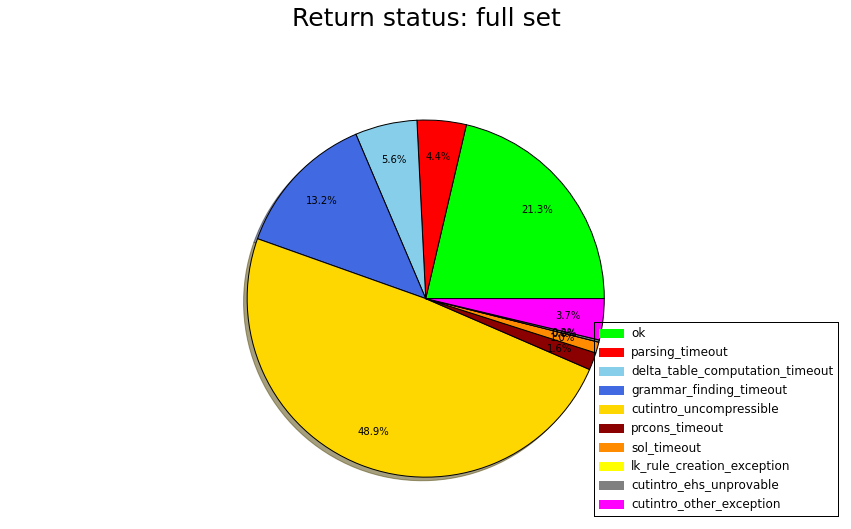

In [9]:
status = data.groupby(['status']).size()

labellst = ['ok', 
            'parsing_timeout', 
            'delta_table_computation_timeout',
            'grammar_finding_timeout',
            'cutintro_uncompressible',
            'prcons_timeout',
            'sol_timeout',
            'lk_rule_creation_exception',
            'cutintro_ehs_unprovable',
            'cutintro_other_exception'
            ]

colorlst = ['lime',
            'red',
            'skyblue',
            'royalblue',
            'gold',
            'darkred',
            'darkorange',
            'yellow',
            'gray',
            'fuchsia'
            ]

values = [status[l] if l in status else 0 for l in labellst]

handles = [mpatches.Patch(color=c, label=l) for c, l in zip(colorlst, labellst)]

plt.figure(figsize=(15,8))
plt.axis('equal')
plt.pie(values, autopct='%1.1f%%', shadow=True, colors=colorlst, radius=1.0, pctdistance=0.8)
plt.title("Return status: full set", size=25, y=1.1)
plt.legend(handles, labellst, loc = 'lower right')

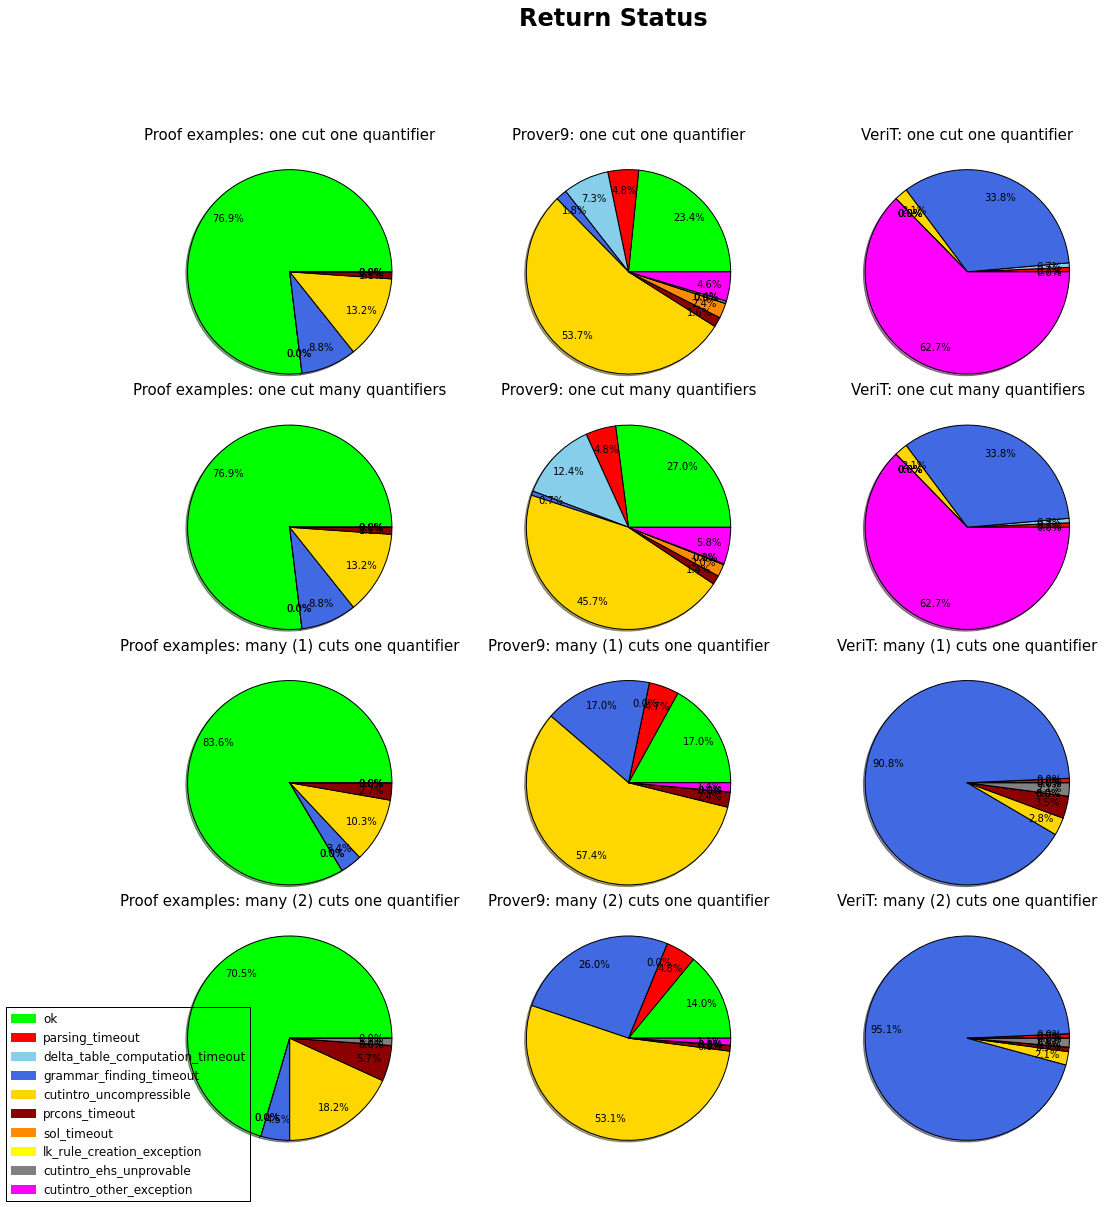

In [10]:
status_ocoq_examples = data_ocoq_examples.groupby(['status']).size()
status_ocmq_examples = data_ocmq_examples.groupby(['status']).size()
status_mcoq1_examples = data_mcoq1_examples.groupby(['status']).size()
status_mcoq2_examples = data_mcoq2_examples.groupby(['status']).size()

status_ocoq_prover9 = data_ocoq_prover9.groupby(['status']).size()
status_ocmq_prover9 = data_ocmq_prover9.groupby(['status']).size()
status_mcoq1_prover9 = data_mcoq1_prover9.groupby(['status']).size()
status_mcoq2_prover9 = data_mcoq2_prover9.groupby(['status']).size()

status_ocoq_verit = data_ocoq_verit.groupby(['status']).size()
status_ocmq_verit = data_ocmq_verit.groupby(['status']).size()
status_mcoq1_verit = data_mcoq1_verit.groupby(['status']).size()
status_mcoq2_verit = data_mcoq2_verit.groupby(['status']).size()

def getValues (status):
    return [status[l] if l in status else 0 for l in labellst]

plt.figure(1, figsize=(17,17))
plt.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
plt.figlegend(handles, labellst, loc='lower left')
plt.suptitle("Return Status", fontsize=24, fontweight='bold')

# LINE 1: one cut one quantifier
plt.subplot(4, 3, 1)
plt.axis('equal')
plt.pie(getValues(status_ocoq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 2)
plt.axis('equal')
plt.pie(getValues(status_ocoq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 3)
plt.axis('equal')
plt.pie(getValues(status_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut one quantifier", size=15, y=1.1)

# LINE 2: one cut many quantifiers
plt.subplot(4, 3, 4)
plt.axis('equal')
plt.pie(getValues(status_ocmq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 5)
plt.axis('equal')
plt.pie(getValues(status_ocmq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 6)
plt.axis('equal')
plt.pie(getValues(status_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut many quantifiers", size=15, y=1.1)

# LINE 3: many (1) cuts one quantifier
plt.subplot(4, 3, 7)
plt.axis('equal')
plt.pie(getValues(status_mcoq1_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 8)
plt.axis('equal')
plt.pie(getValues(status_mcoq1_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 9)
plt.axis('equal')
plt.pie(getValues(status_mcoq1_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (1) cuts one quantifier", size=15, y=1.1)

# LINE 4: many (2) cuts one quantifier
plt.subplot(4, 3, 10)
plt.axis('equal')
plt.pie(getValues(status_mcoq2_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 11)
plt.axis('equal')
plt.pie(getValues(status_mcoq2_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 12)
plt.axis('equal')
plt.pie(getValues(status_mcoq2_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (2) cuts one quantifier", size=15, y=1.1)

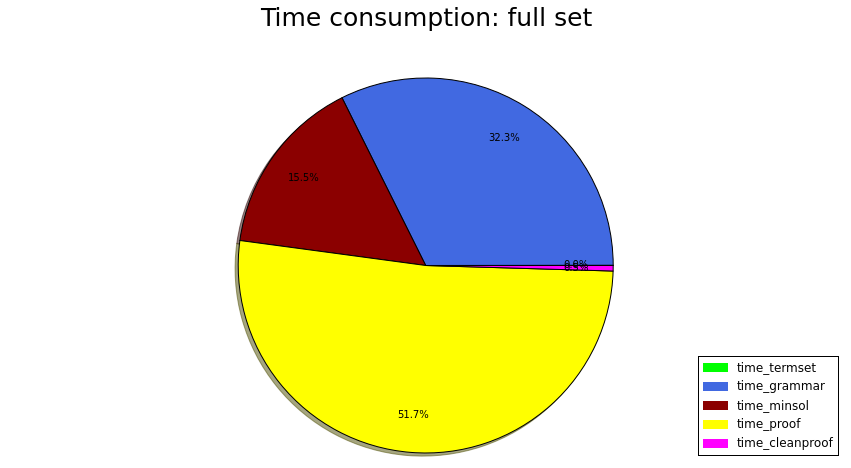

In [11]:
timecols = ['time_termset', 'time_grammar', 'time_minsol', 'time_proof', 'time_cleanproof']
times = []
def getTimes (data):
    times = []
    for c in timecols:
        times.append(data[c].mean())
    return times

times = pd.Series(getTimes(data), index=timecols)

colorlst = ['lime',
            'royalblue',
            'darkred',
            'yellow',
            'fuchsia'
            ]

values = [times[t] for t in timecols]

handles = [mpatches.Patch(color=c, label=t) for c, t in zip(colorlst, timecols)]

plt.figure(figsize=(15,7))
plt.axis('equal')
plt.pie(values, autopct='%1.1f%%', shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Time consumption: full set", size=25, y=1.1)
plt.legend(handles, timecols, loc = 'lower right')

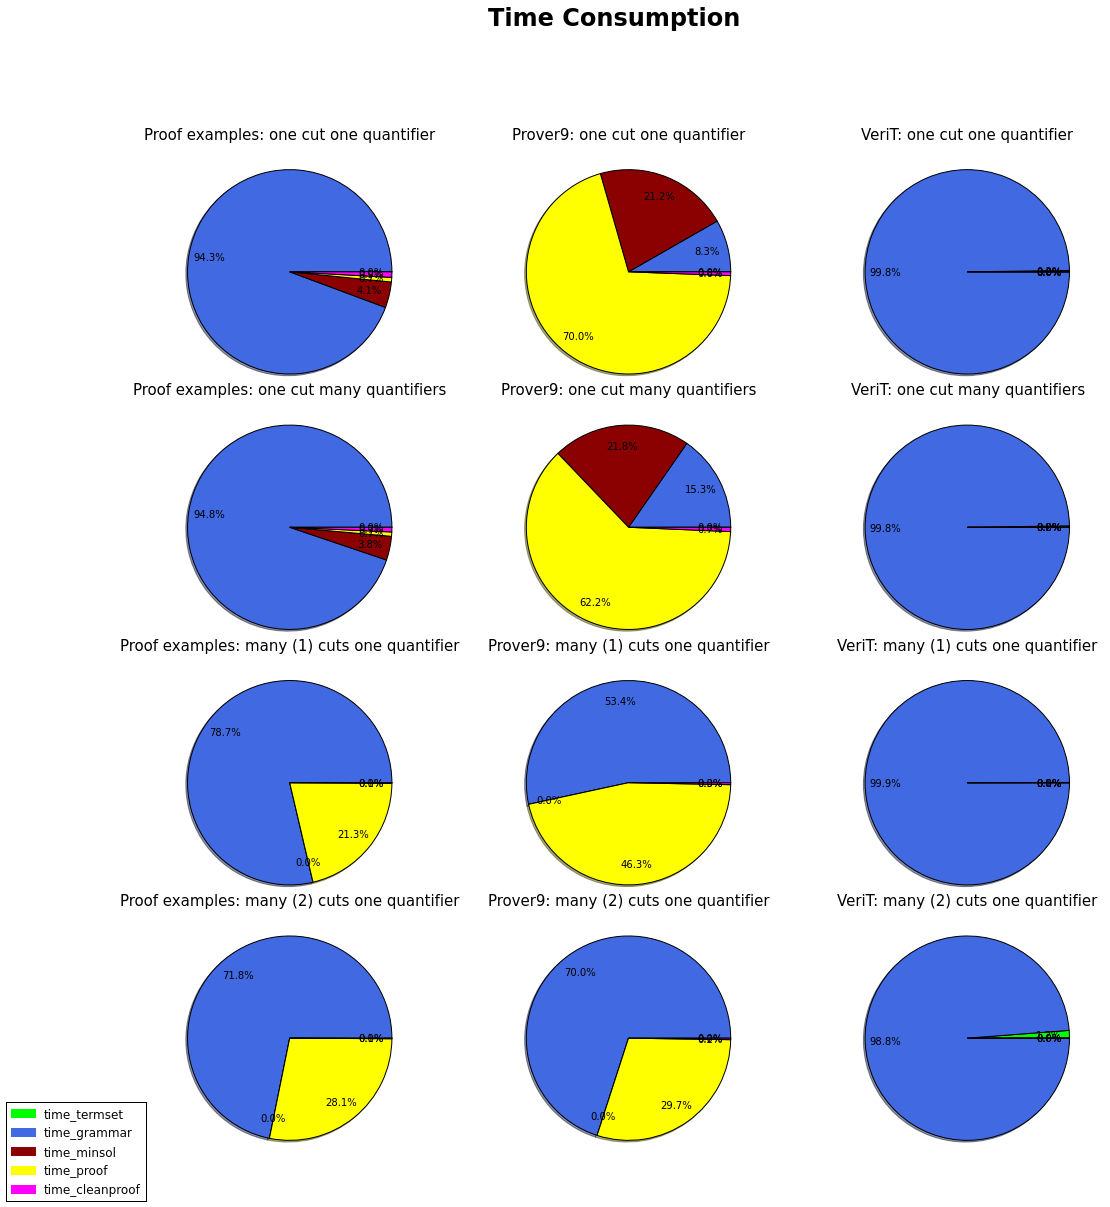

In [12]:
def getTimeValues (data):
    times = pd.Series(getTimes(data), index=timecols).replace(np.nan, 0)
    return [times[t] if t in times else 0 for t in timecols]

plt.figure(1, figsize=(17,17))
plt.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
plt.figlegend(handles, timecols, loc='lower left')
plt.suptitle("Time Consumption", fontsize=24, fontweight='bold')

# LINE 1: one cut one quantifier
plt.subplot(4, 3, 1)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 2)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 3)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut one quantifier", size=15, y=1.1)

# LINE 2: one cut many quantifiers
plt.subplot(4, 3, 4)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 5)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 6)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut many quantifiers", size=15, y=1.1)

# LINE 3: many (1) cuts one quantifier
plt.subplot(4, 3, 7)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 8)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 9)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (1) cuts one quantifier", size=15, y=1.1)

# LINE 4: many (2) cuts one quantifier
plt.subplot(4, 3, 10)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 11)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 12)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (2) cuts one quantifier", size=15, y=1.1)

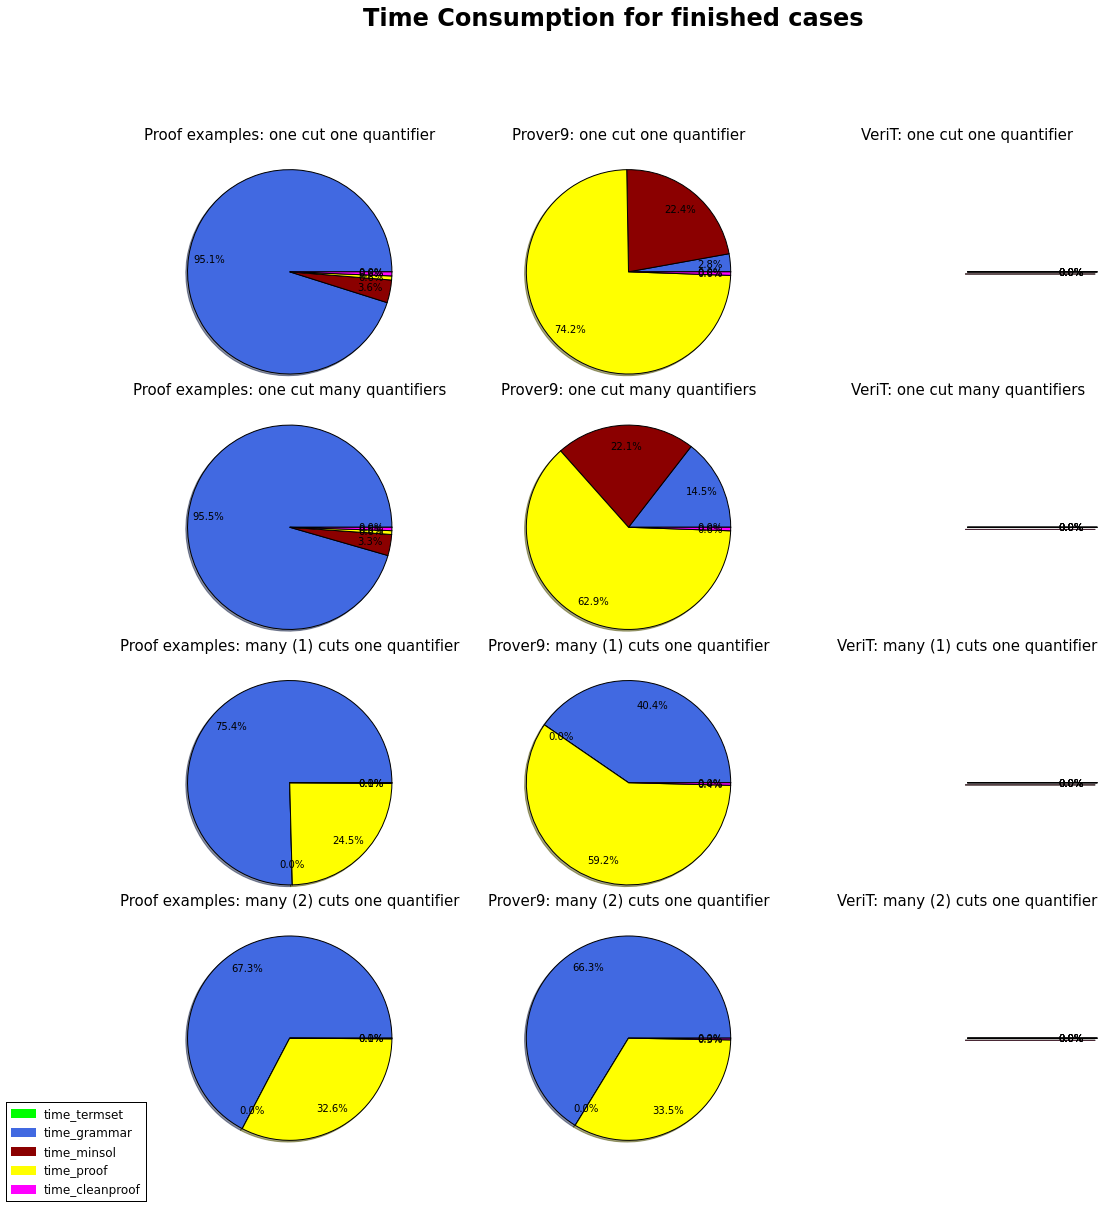

In [13]:
# Separating data by method and database (ok examples)
data_ocoq_examples_ok = data[(data.method == 'one_cut_one_quant') & (data.db == 0) & (data.status == 'ok')]
data_ocoq_prover9_ok = data[(data.method == 'one_cut_one_quant') & (data.db == 1) & (data.status == 'ok')]
data_ocoq_verit_ok = data[(data.method == 'one_cut_one_quant') & (data.db == 2) & (data.status == 'ok')]
data_ocmq_examples_ok = data[(data.method == 'one_cut_many_quant') & (data.db == 0) & (data.status == 'ok')]
data_ocmq_prover9_ok = data[(data.method == 'one_cut_many_quant') & (data.db == 1) & (data.status == 'ok')]
data_ocmq_verit_ok = data[(data.method == 'one_cut_many_quant') & (data.db == 2) & (data.status == 'ok')]
data_mcoq1_examples_ok = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 0) & (data.status == 'ok')]
data_mcoq1_prover9_ok = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 1) & (data.status == 'ok')]
data_mcoq1_verit_ok = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 2) & (data.status == 'ok')]
data_mcoq2_examples_ok = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 0) & (data.status == 'ok')]
data_mcoq2_prover9_ok = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 1) & (data.status == 'ok')]
data_mcoq2_verit_ok = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 2) & (data.status == 'ok')]

plt.figure(1, figsize=(17,17))
plt.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
plt.figlegend(handles, timecols, loc='lower left')
plt.suptitle("Time Consumption for finished cases", fontsize=24, fontweight='bold')

# LINE 1: one cut one quantifier
plt.subplot(4, 3, 1)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 2)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 3)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut one quantifier", size=15, y=1.1)

# LINE 2: one cut many quantifiers
plt.subplot(4, 3, 4)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 5)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 6)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut many quantifiers", size=15, y=1.1)

# LINE 3: many (1) cuts one quantifier
plt.subplot(4, 3, 7)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 8)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 9)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (1) cuts one quantifier", size=15, y=1.1)

# LINE 4: many (2) cuts one quantifier
plt.subplot(4, 3, 10)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 11)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 12)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (2) cuts one quantifier", size=15, y=1.1)

In [14]:
# For Daniel
more_than_one_cut = data[(data.cuts_in > 1)]
print(more_than_one_cut.shape)
more_than_one_cut

(985, 20)


,method,file,status,inf_input,quant_input,cuts_in,inf_output,quant_output,termset,mingrammar,num_mingrammars,can_sol,min_sol,time_termset,time_dtable,time_grammar,time_minsol,time_proof,time_cleanproof,db
340,many_cuts_one_quant_2,LinearExampleProof(13),ok,38,13,2,1693,10,13,8,NaN,18,NaN,0,NaN,2206,NaN,1168,14,0
345,many_cuts_one_quant_2,LinearExampleProof(18),prcons_timeout,53,18,2,NaN,NaN,18,9,NaN,32,NaN,0,NaN,15615,NaN,NaN,NaN,0
352,many_cuts_one_quant_2,SquareDiagonalExampleProof(7),ok,54,28,2,240,12,14,8,NaN,16,NaN,0,NaN,394,NaN,116,2,0
354,many_cuts_one_quant_2,SquareDiagonalExampleProof(9),ok,70,36,2,798,15,18,9,NaN,32,NaN,0,NaN,1450,NaN,1184,9,0
356,many_cuts_one_quant_2,SquareDiagonalExampleProof(11),prcons_timeout,86,44,2,NaN,NaN,22,10,NaN,32,NaN,1,NaN,6638,NaN,NaN,NaN,0
361,many_cuts_one_quant_2,SquareEdgesExampleProof(5),ok,34,16,2,542,11,10,7,NaN,16,NaN,1,NaN,202,NaN,293,5,0
366,many_cuts_one_quant_2,SquareEdgesExampleProof(10),ok,69,31,2,12176,15,20,9,NaN,32,NaN,1,NaN,7930,NaN,40262,146,0
367,many_cuts_one_quant_2,SquareEdgesExampleProof(11),prcons_timeout,76,34,2,NaN,NaN,22,10,NaN,24,NaN,1,NaN,23639,NaN,NaN,NaN,0
372,many_cuts_one_quant_2,SquareEdges2DimExampleProof(5),cutintro_ehs_unprovable,34,16,2,NaN,NaN,10,10,NaN,12,NaN,0,NaN,1645,NaN,NaN,NaN,0
384,many_cuts_one_quant_2,LinearEqExampleProof(10),ok,79,41,2,253,13,21,10,NaN,20,NaN,1,NaN,4069,NaN,166,2,0


In [15]:
data['status'].value_counts()

cutintro_uncompressible            6177
ok                                 2693
grammar_finding_timeout            1661
delta_table_computation_timeout     708
parsing_timeout                     561
cutintro_other_exception            470
prcons_timeout                      199
sol_timeout                         126
cutintro_ehs_unprovable              25
dtype: int64

Different grammar sizes between different methods:

In [16]:
data[data.mingrammar == data.mingrammar] \
    .groupby('file') \
    .filter(lambda x: len(set(x.mingrammar)) > 1) \
    .sort('file')[['file', 'method', 'mingrammar']]

,file,method,mingrammar
281,LinearEqExampleProof(13),many_cuts_one_quant_1,12
387,LinearEqExampleProof(13),many_cuts_one_quant_2,11
282,LinearEqExampleProof(14),many_cuts_one_quant_1,12
388,LinearEqExampleProof(14),many_cuts_one_quant_2,11
52,SquareEdges2DimExampleProof(10),one_cut_one_quant,17
143,SquareEdges2DimExampleProof(10),one_cut_many_quant,17
265,SquareEdges2DimExampleProof(10),many_cuts_one_quant_1,14
53,SquareEdges2DimExampleProof(11),one_cut_one_quant,18
144,SquareEdges2DimExampleProof(11),one_cut_many_quant,18
266,SquareEdges2DimExampleProof(11),many_cuts_one_quant_1,14
